# FFT vs. direct Gaussian in Fourier space

This notebook contains mainly test cases for ``2d_gaussian_in_freq_space.py``.

In the first part of the notebook we test that the direct 2d Gaussian calculation
matches with the FFT of the sampled one.

Also we demonstrate that FFT is more accurate for power of 2 cases, a known behavior of FFT.

In the second part of the notebook we demonstrate how FFT get aliased in the input is too narrow.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%run -b -i "2d_gaussian_in_freq_space.py"

In [2]:
R2 = calculate2dGaussianArray(20, 20, 2, fftShift=True)

<IPython.core.display.Javascript object>


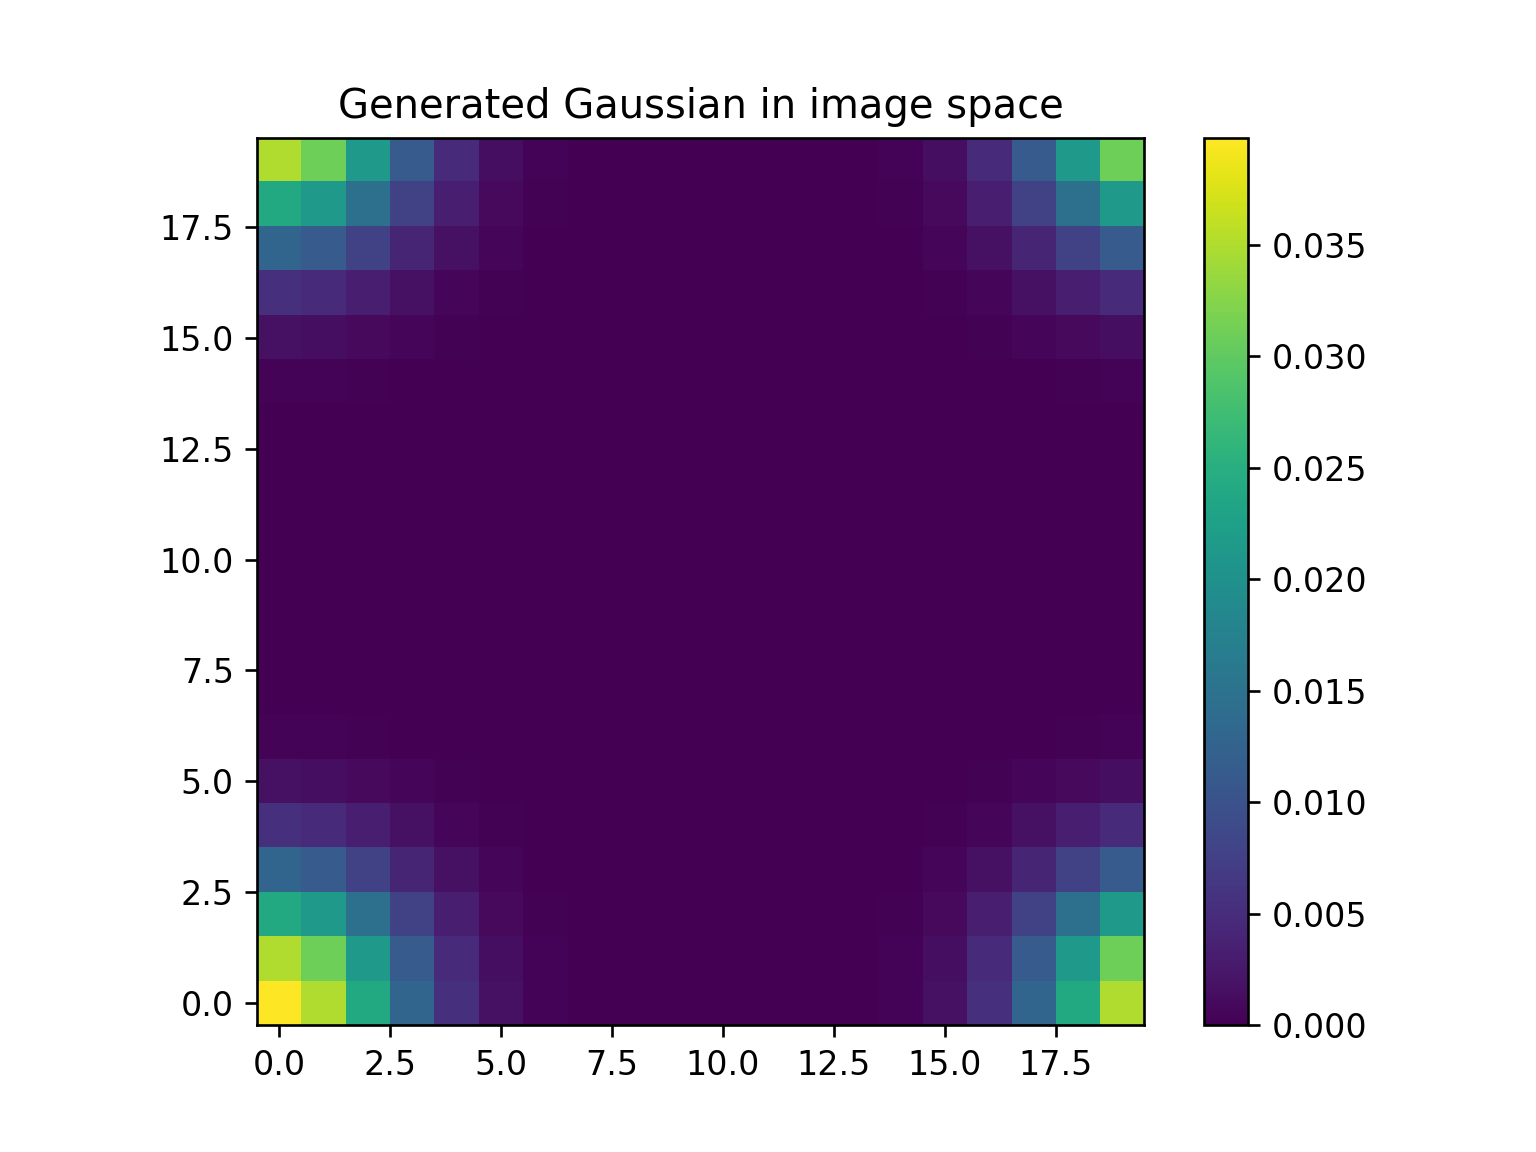

Text(0.5, 1.0, 'Generated Gaussian in image space')

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(R2, origin='lower')
fig.colorbar(cs)
ax.set_title("Generated Gaussian in image space")

In [4]:
fR2 = np.fft.fft2(R2)

### Testing that the calculated array was properly centered
The FFT should be all real

In [5]:
print(np.all(fR2.imag < np.finfo(dtype=np.float).tiny))

True


<IPython.core.display.Javascript object>


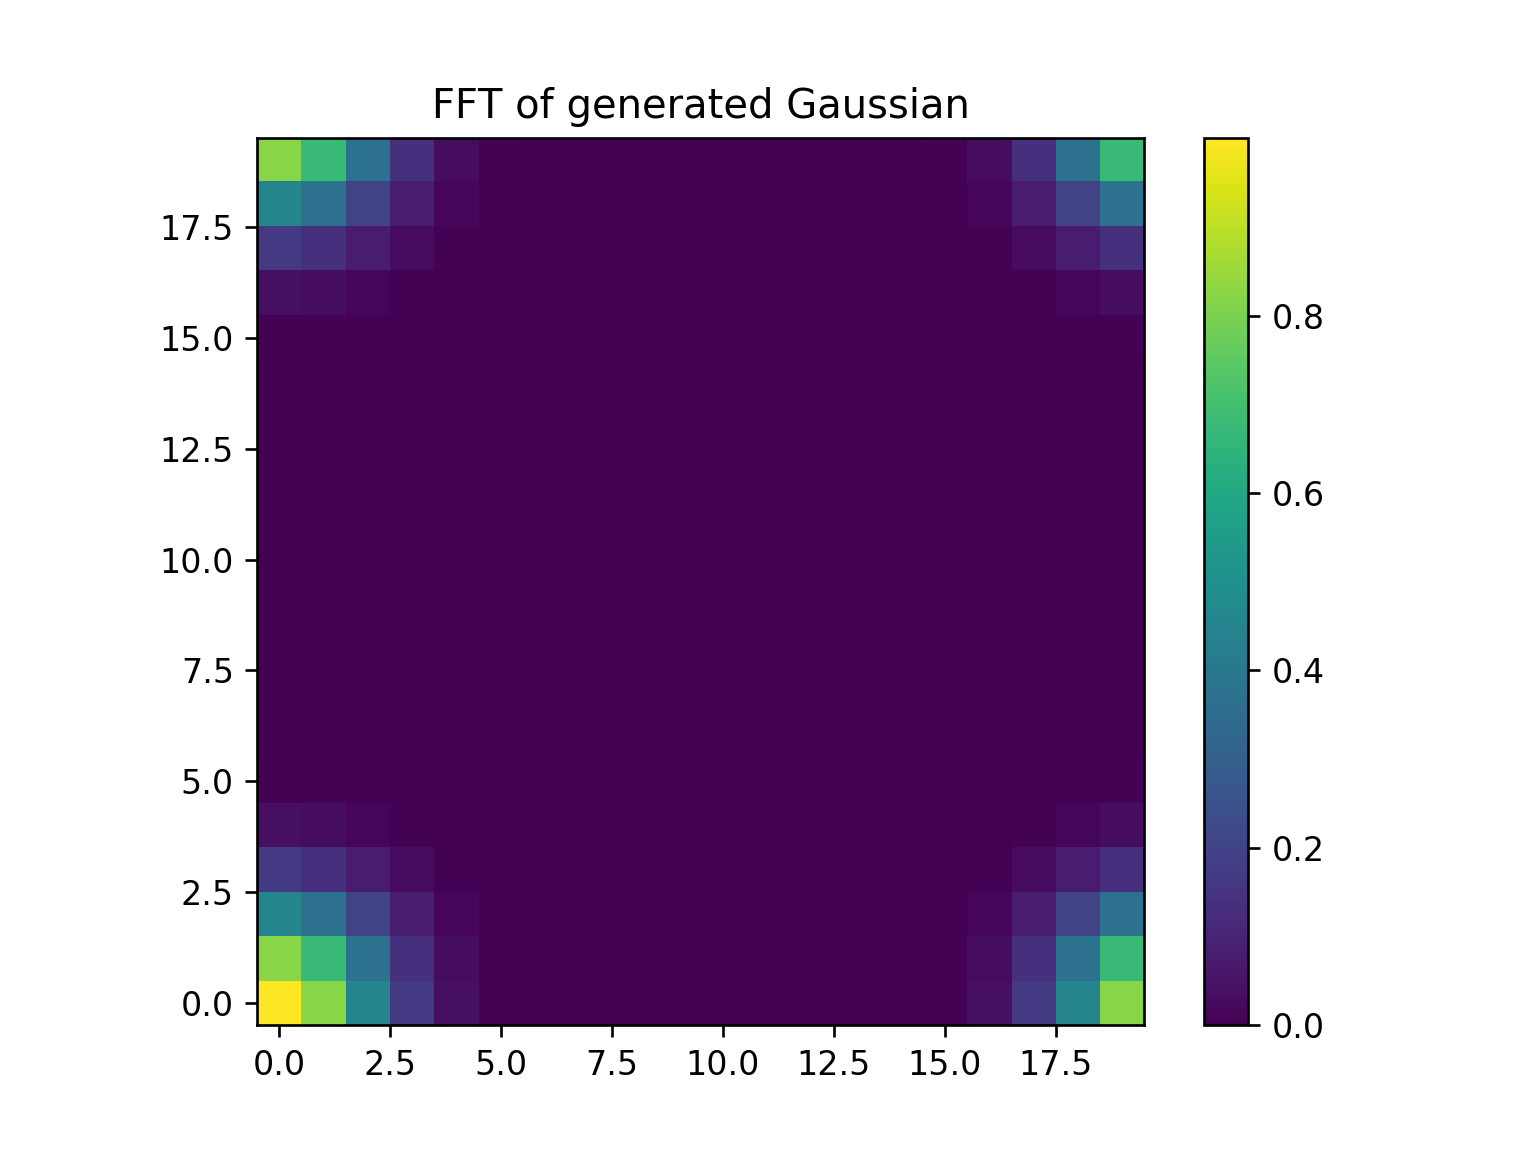

Text(0.5, 1.0, 'FFT of generated Gaussian')

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(fR2.real, origin='lower')
fig.colorbar(cs)
ax.set_title("FFT of generated Gaussian")

<IPython.core.display.Javascript object>


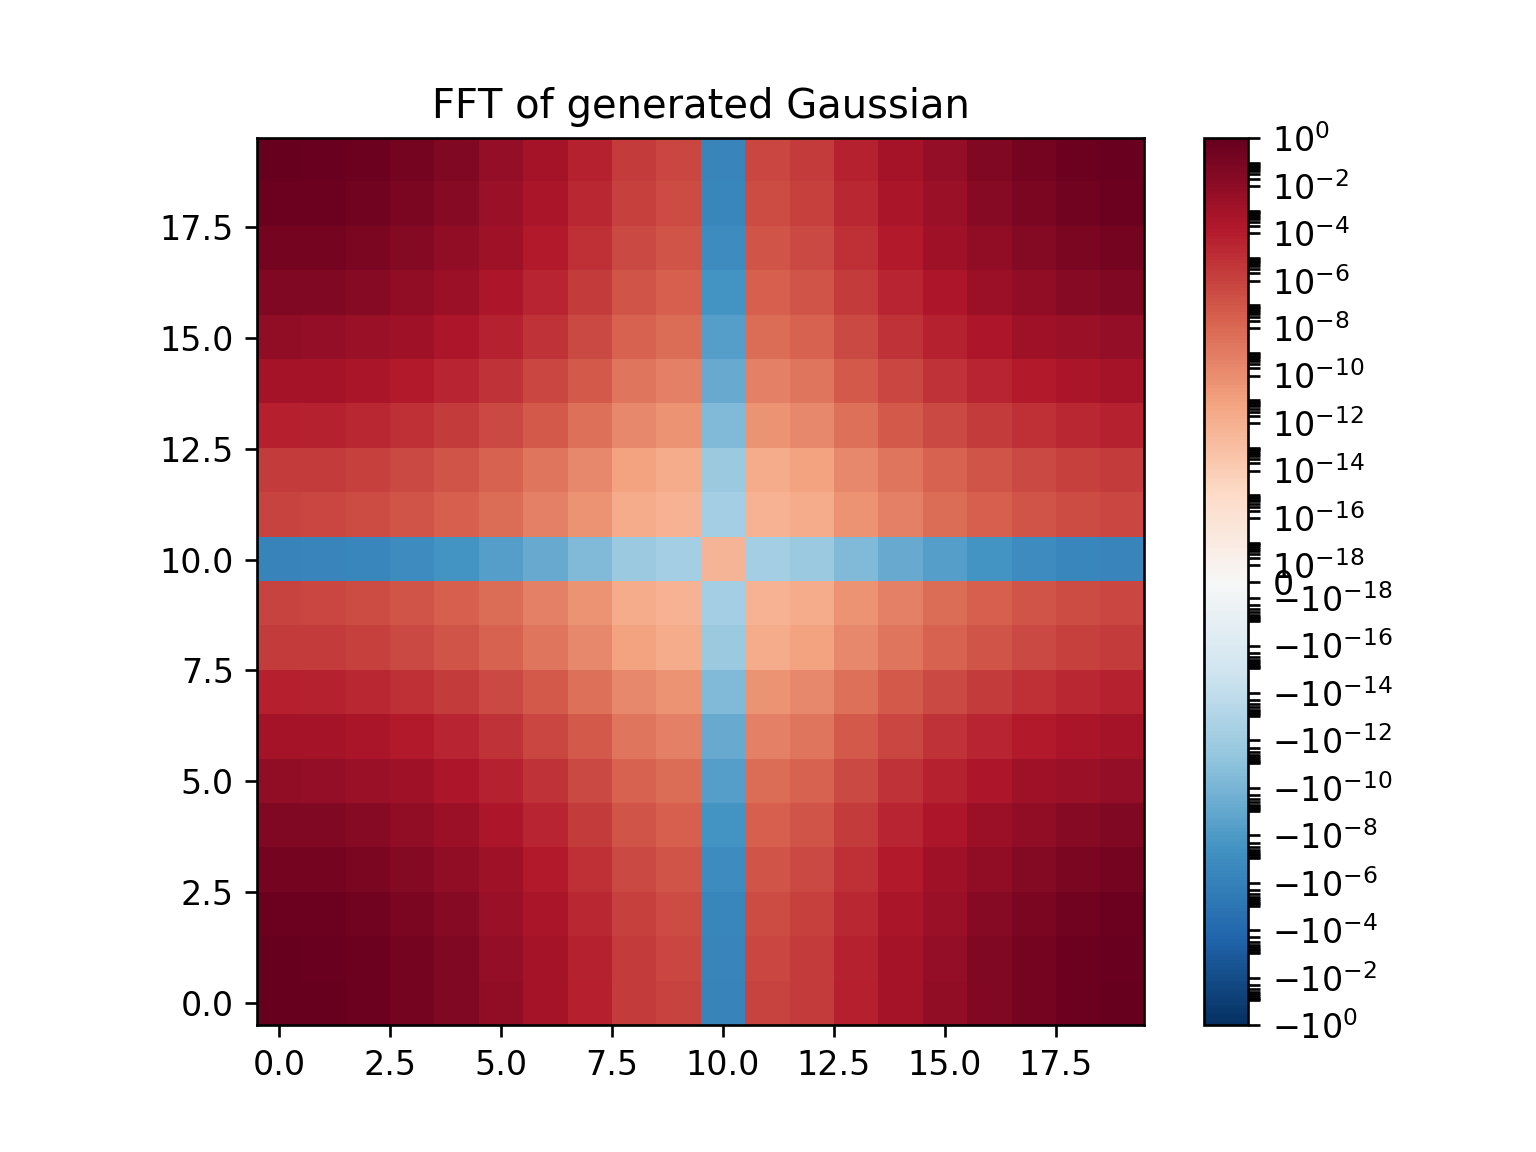

Text(0.5, 1.0, 'FFT of generated Gaussian')

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(fR2.real, origin='lower', interpolation='none', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-18,vmin=-1,vmax=1))
fig.colorbar(cs)
ax.set_title("FFT of generated Gaussian")

In [8]:
dfR = calculate2dGaussianArray(20,20,2, inFrequencySpace=True, fftShift=True)

<IPython.core.display.Javascript object>


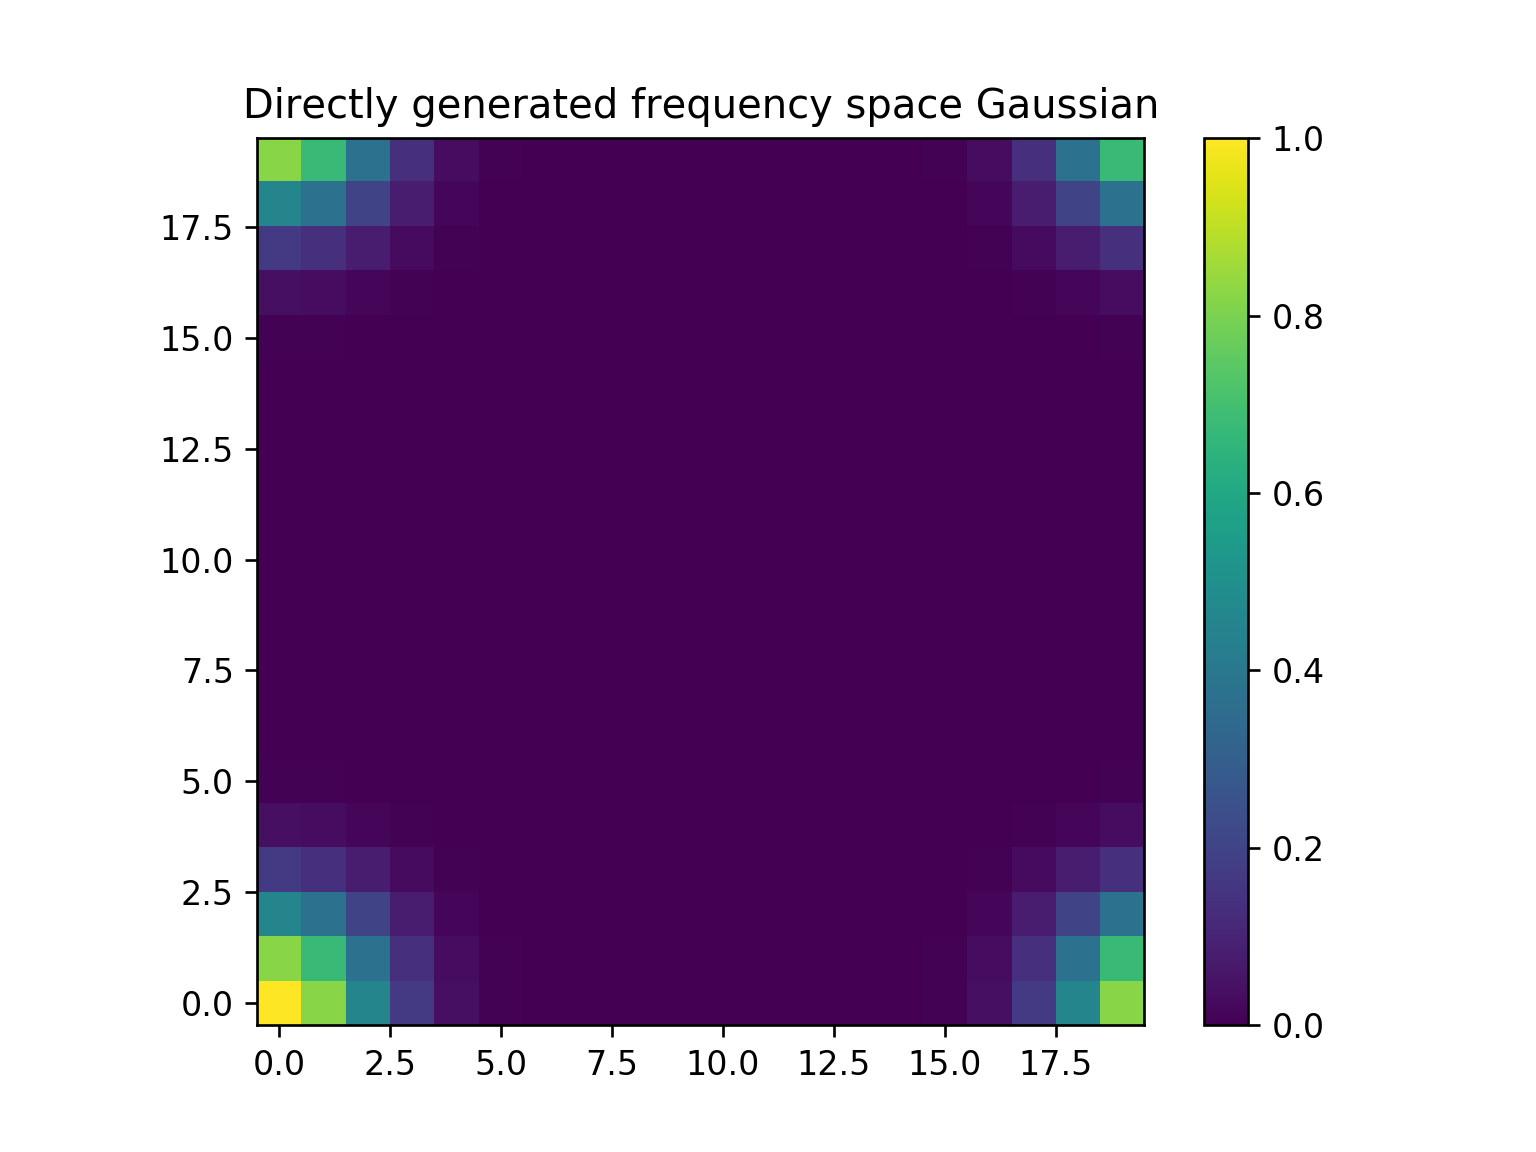

Text(0.5, 1.0, 'Directly generated frequency space Gaussian')

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(dfR, origin='lower', interpolation='none')
fig.colorbar(cs)
ax.set_title("Directly generated frequency space Gaussian")

<IPython.core.display.Javascript object>


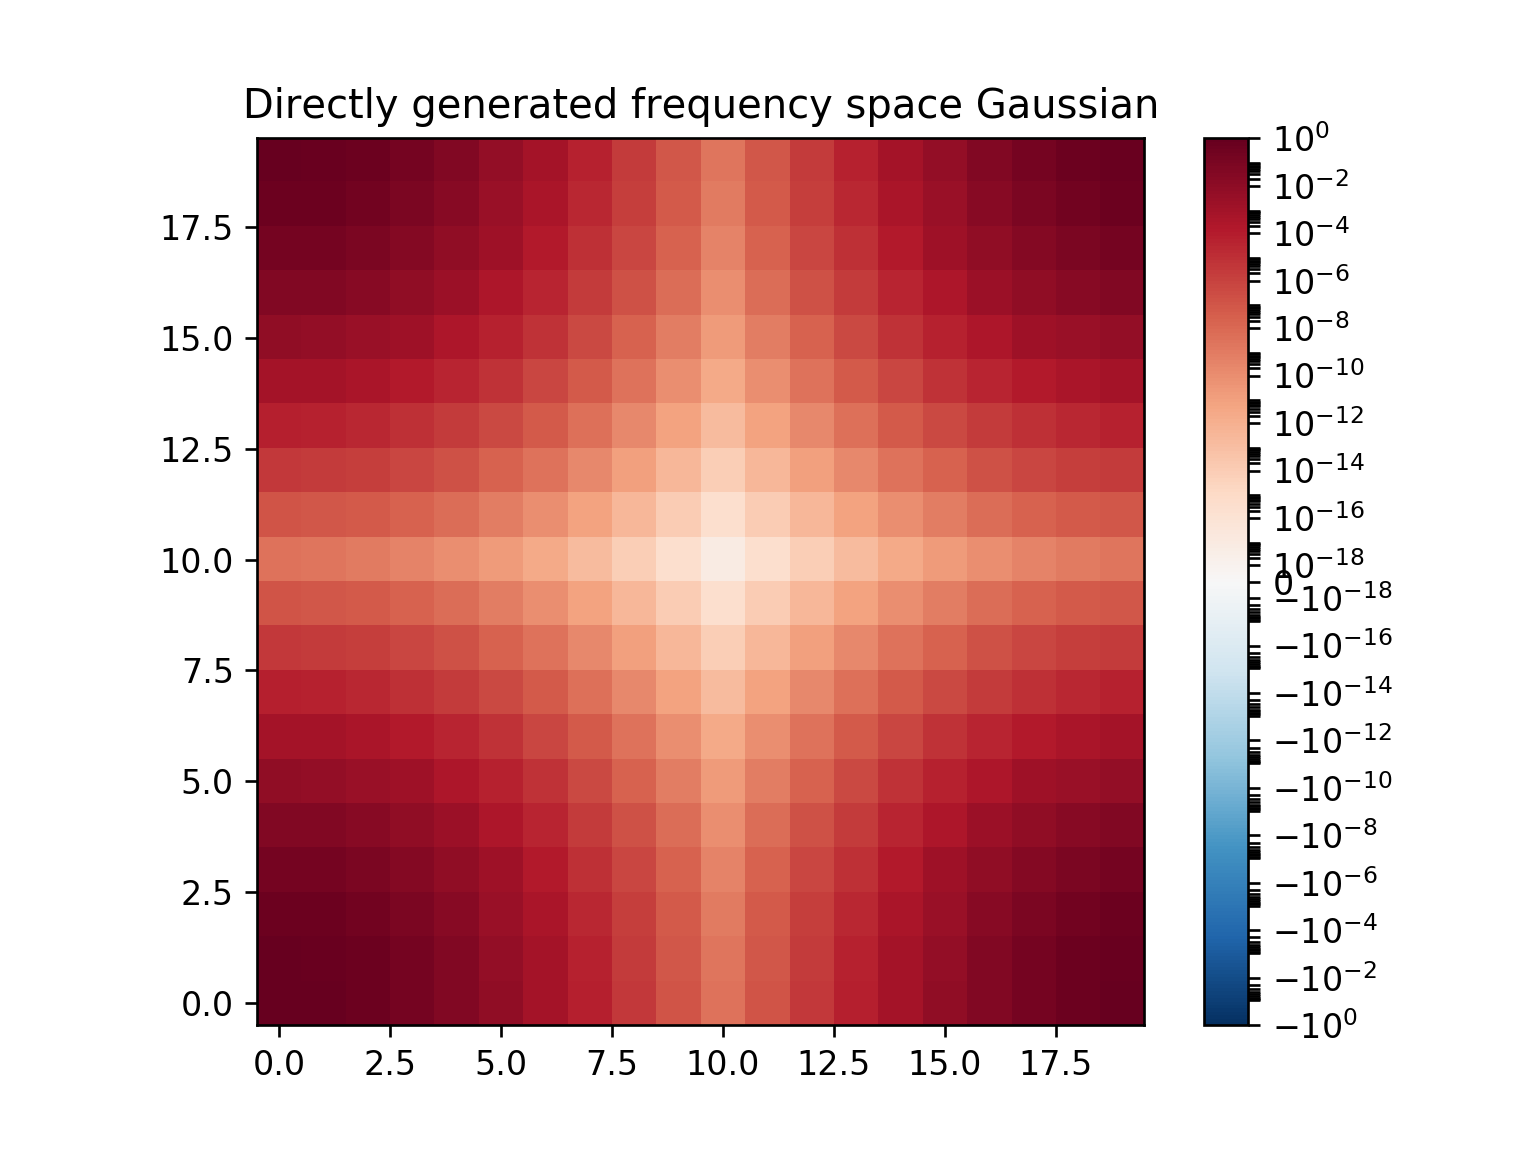

Text(0.5, 1.0, 'Directly generated frequency space Gaussian')

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(dfR, origin='lower', interpolation='none', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-18,vmin=-1,vmax=1))
fig.colorbar(cs)
ax.set_title("Directly generated frequency space Gaussian")

### Check out the difference between the FFT and the directly generated Fourier transform

In [11]:
D = fR2.real - dfR

Compare the two Fourier transform visually first

<IPython.core.display.Javascript object>


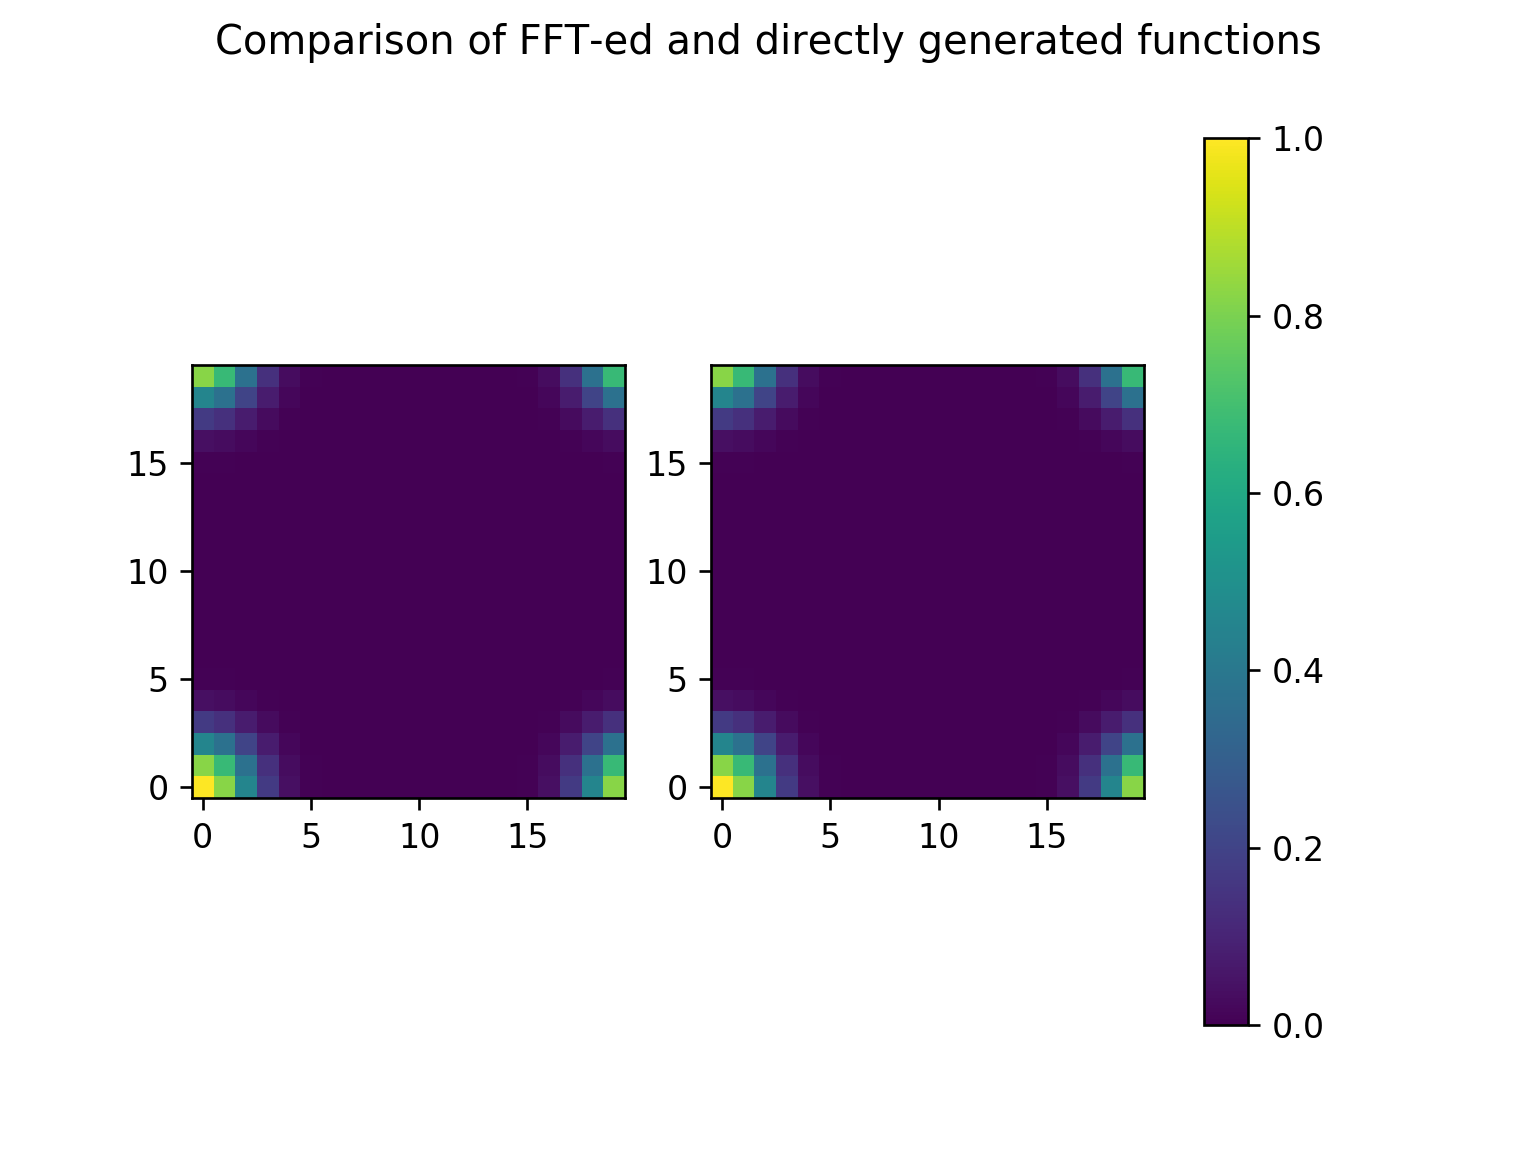

Text(0.5, 0.98, 'Comparison of FFT-ed and directly generated functions')

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(dfR, origin='lower', vmin=0, vmax=1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fR2.real, origin='lower', vmin=0, vmax=1)
fig.colorbar(cs, ax=[ax, ax2])
fig.suptitle("Comparison of FFT-ed and directly generated functions")

See the difference on a log scale

<IPython.core.display.Javascript object>


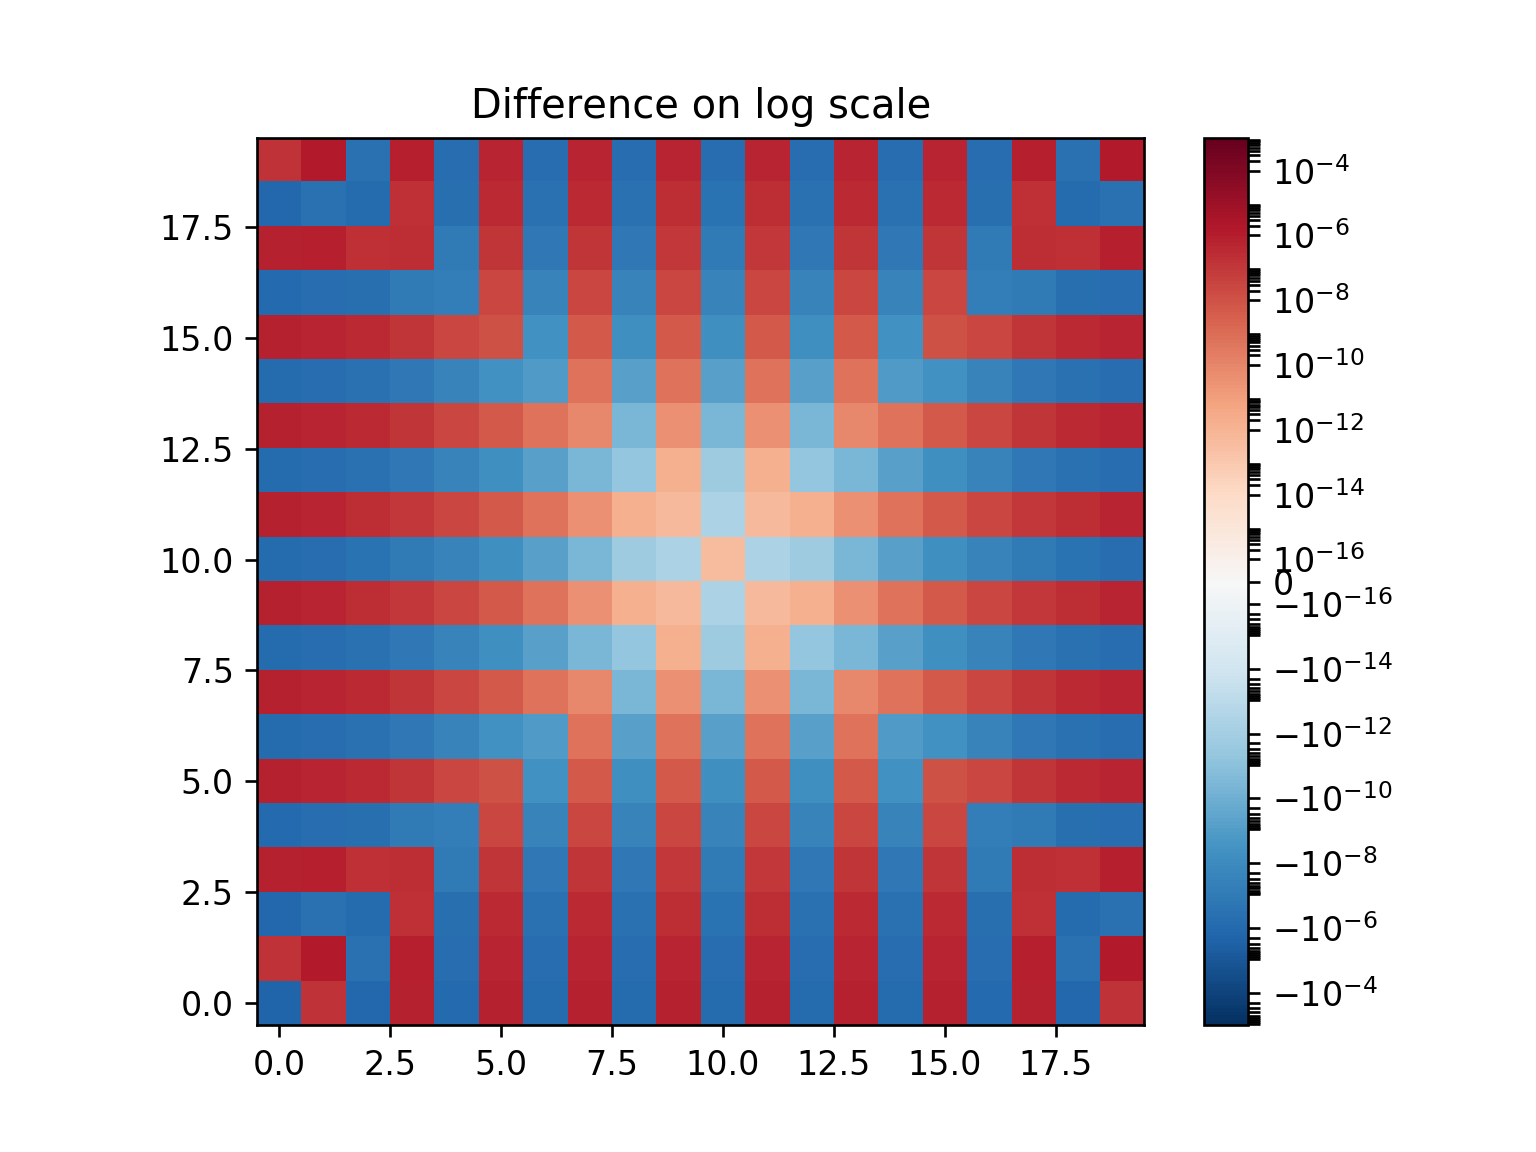

Text(0.5, 1.0, 'Difference on log scale')

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(D, interpolation='none', origin='lower', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-16,vmin=-0.001,vmax=0.001))
fig.colorbar(cs)
ax.set_title("Difference on log scale")

In [14]:
q = np.fabs(fR2.real / dfR)

<IPython.core.display.Javascript object>


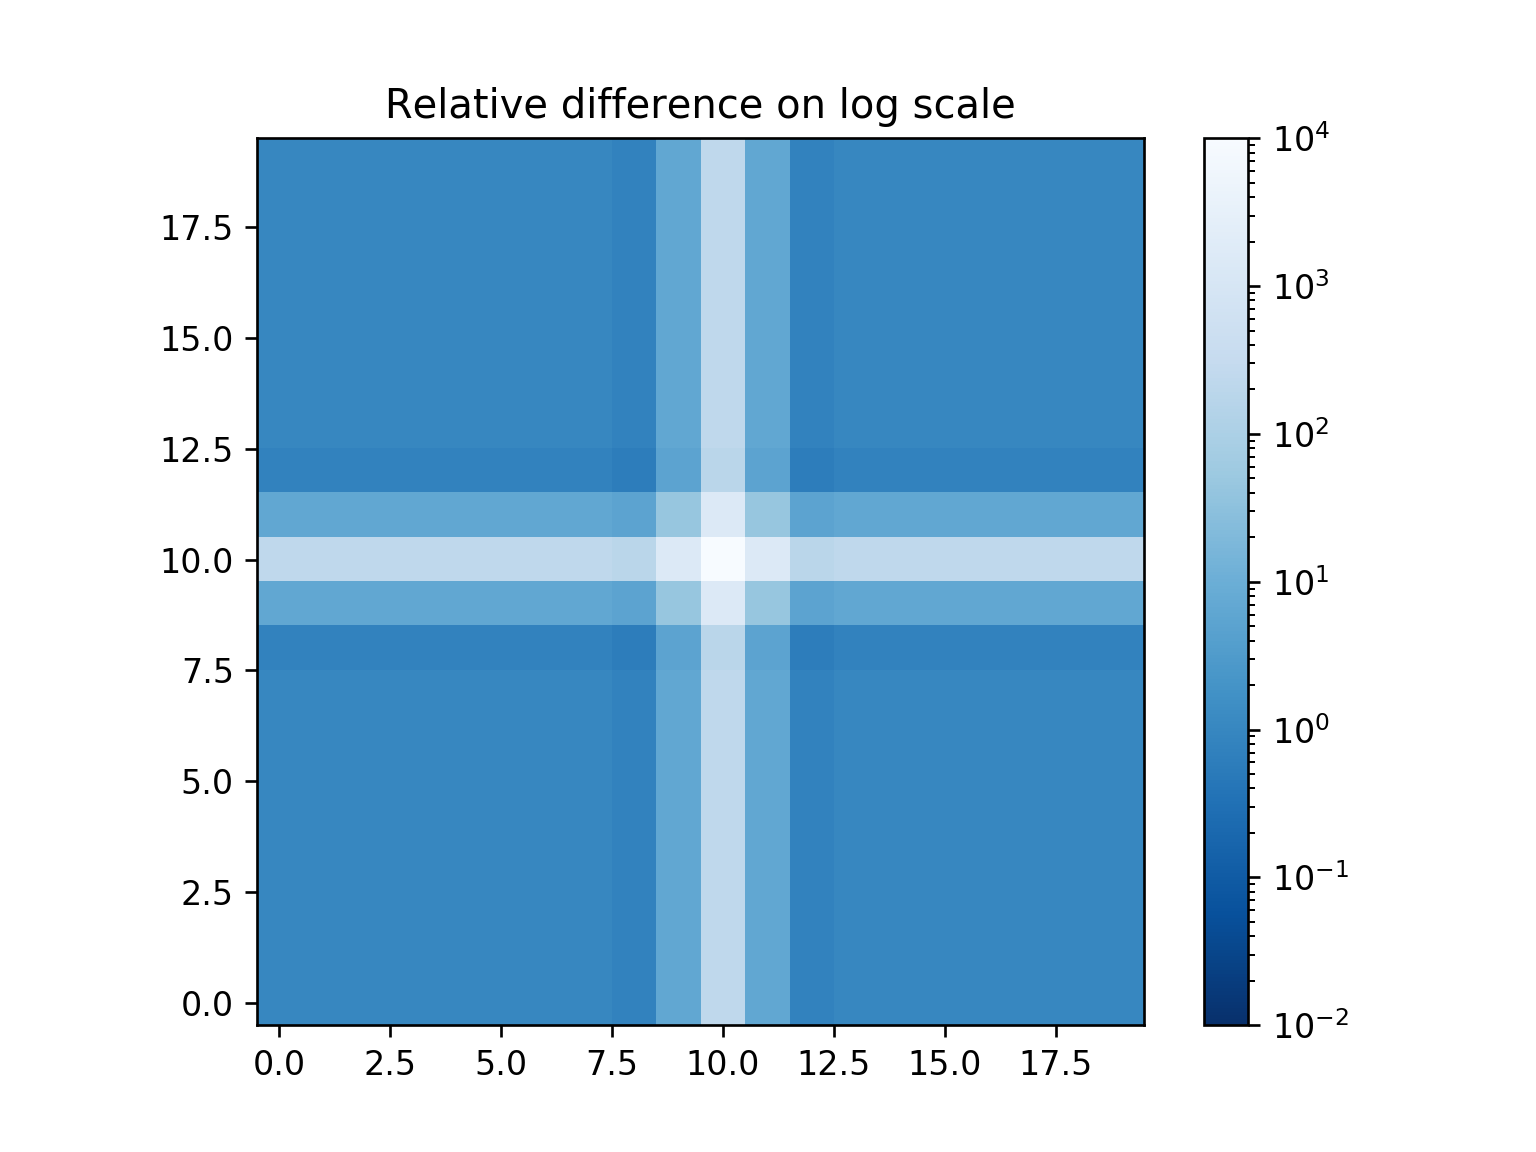

Text(0.5, 1.0, 'Relative difference on log scale')

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(q, interpolation='none', origin='lower',
               cmap='Blues_r',
               norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=1e4))
fig.colorbar(cs)
ax.set_title("Relative difference on log scale")

### Check with power of 2 size FFT - it should be more consistent

In [16]:
R2 = calculate2dGaussianArray(32, 32, 2, fftShift=True)
fR2 = np.fft.fft2(R2)
dfR = calculate2dGaussianArray(32, 32, 2, inFrequencySpace=True, fftShift=True)
D = fR2.real - dfR

<IPython.core.display.Javascript object>


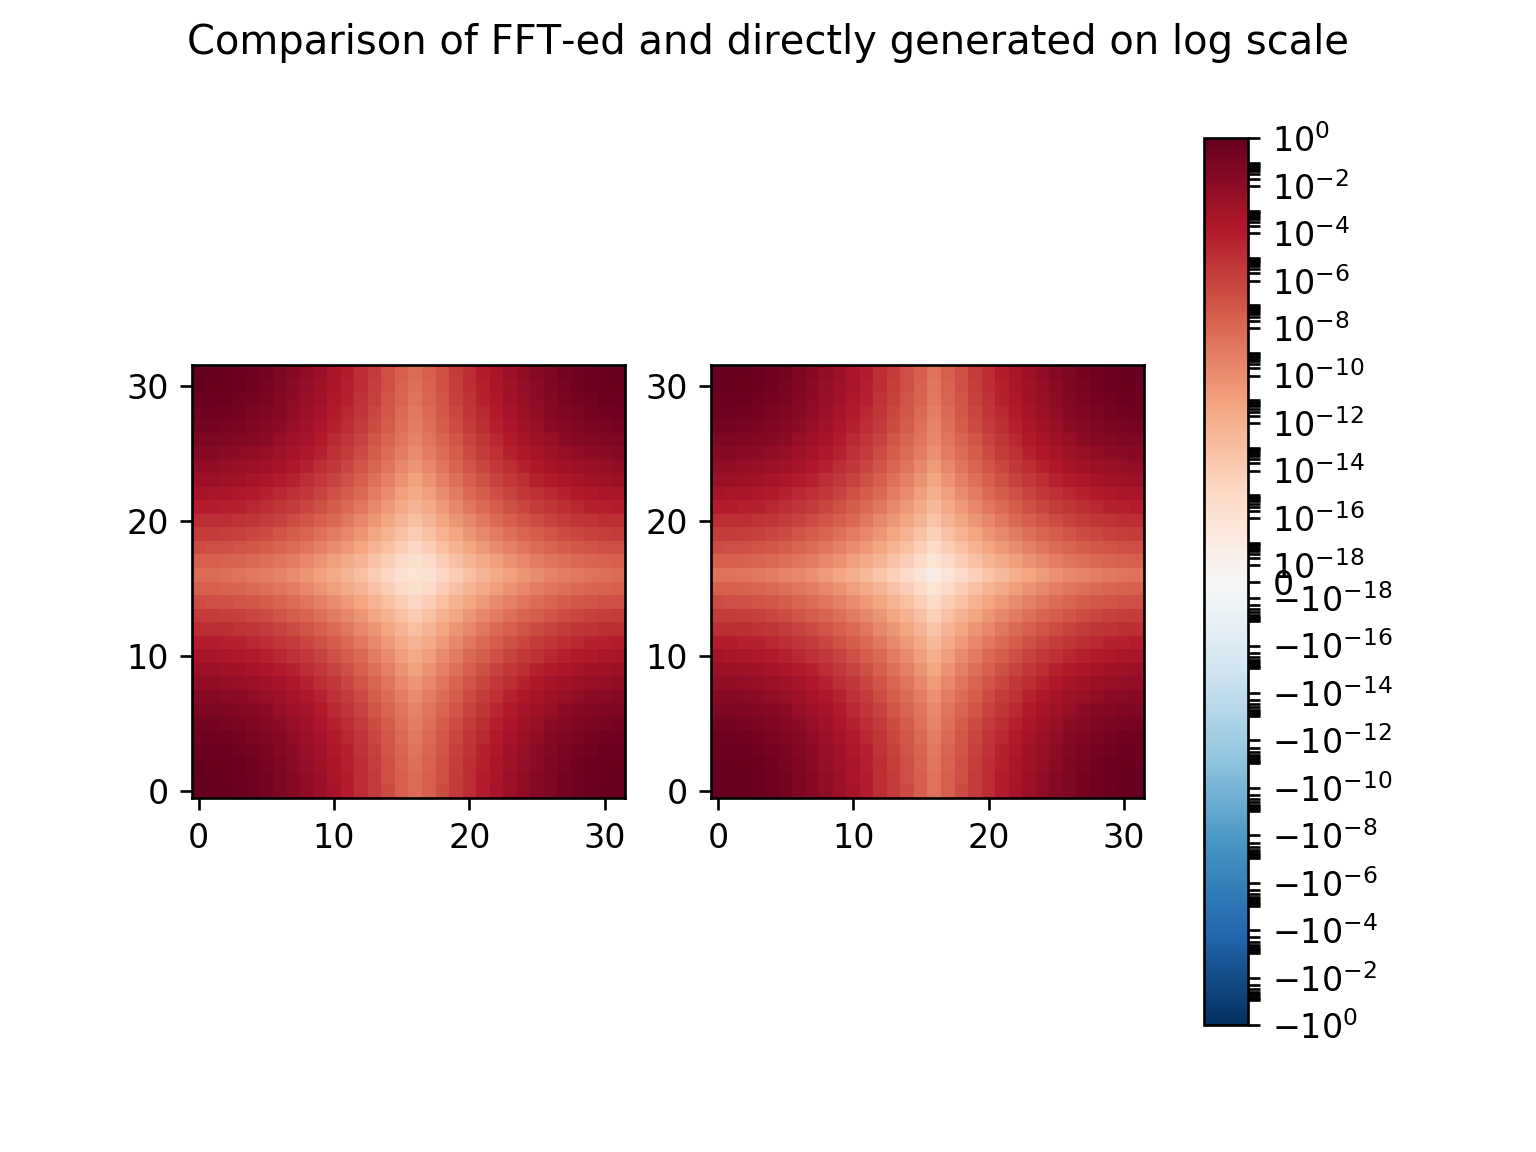

Text(0.5, 0.98, 'Comparison of FFT-ed and directly generated on log scale')

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(fR2.real, origin='lower', interpolation='none', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-18,vmin=-1,vmax=1))
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dfR, origin='lower', interpolation='none', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-18,vmin=-1,vmax=1))
fig.colorbar(cs, ax=[ax, ax2])
fig.suptitle("Comparison of FFT-ed and directly generated on log scale")

<IPython.core.display.Javascript object>


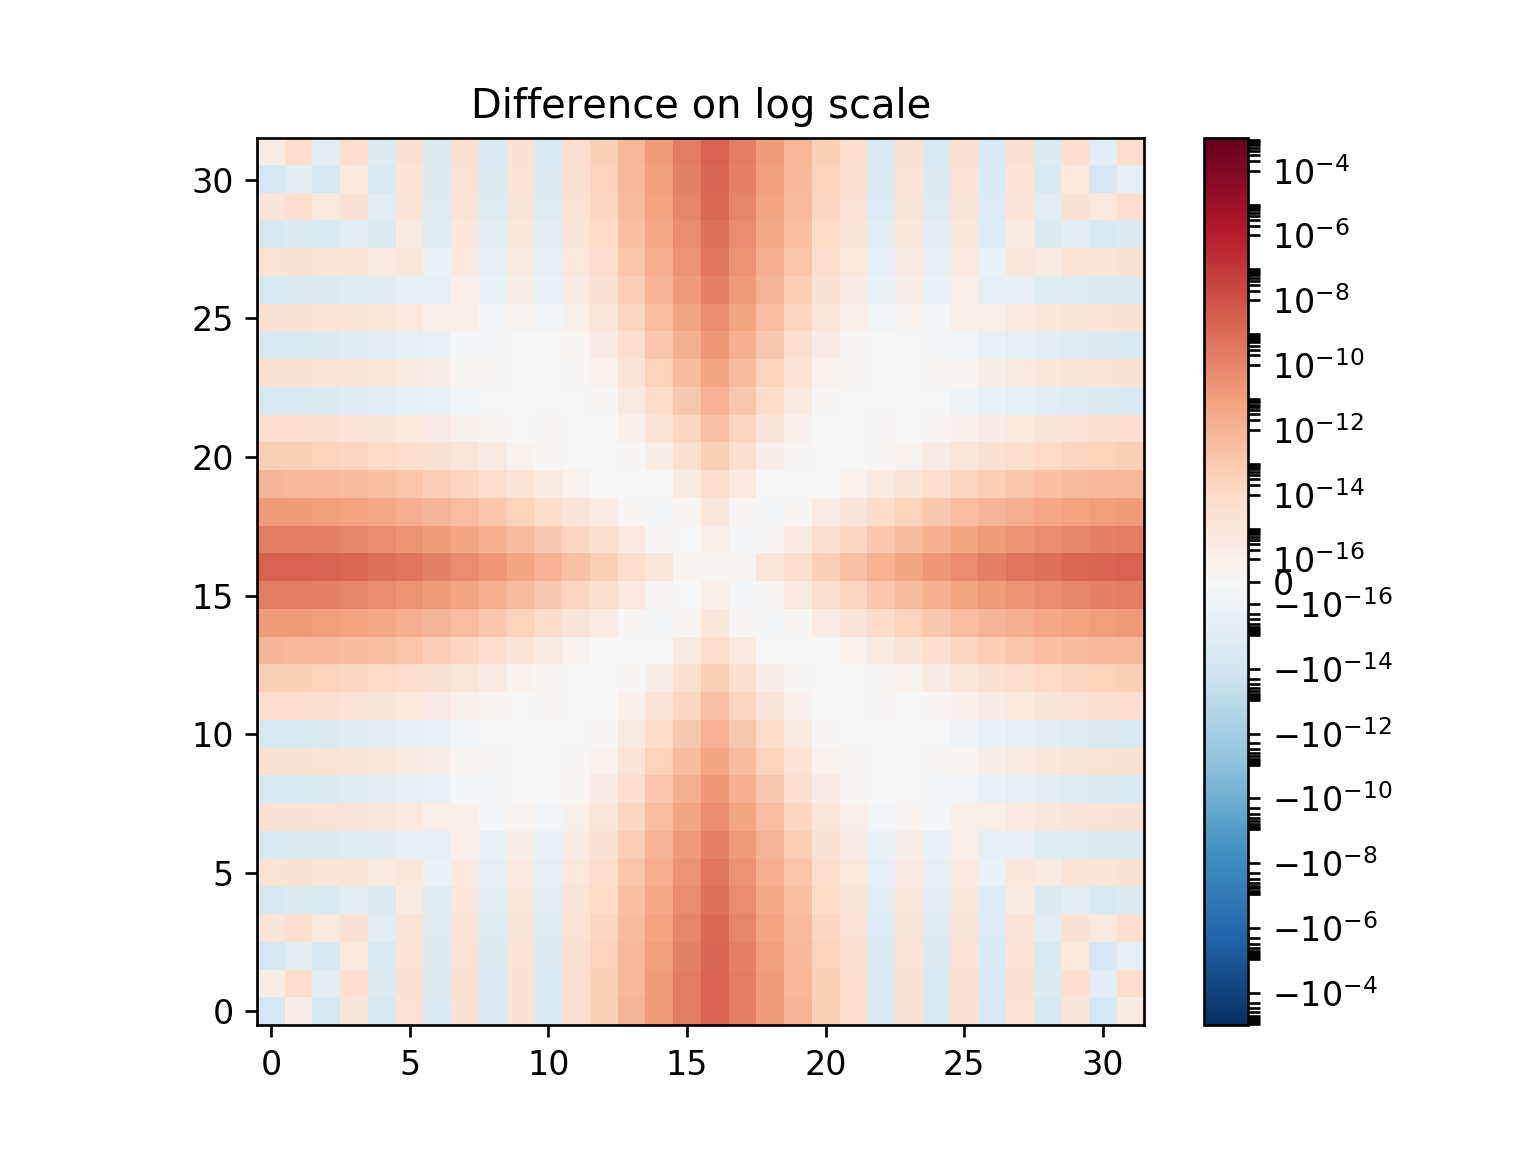

Text(0.5, 1.0, 'Difference on log scale')

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(D, interpolation='none', origin='lower', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-16,vmin=-0.001,vmax=0.001))
fig.colorbar(cs)
ax.set_title("Difference on log scale")

In [19]:
q = np.fabs(fR2.real / dfR)

<IPython.core.display.Javascript object>


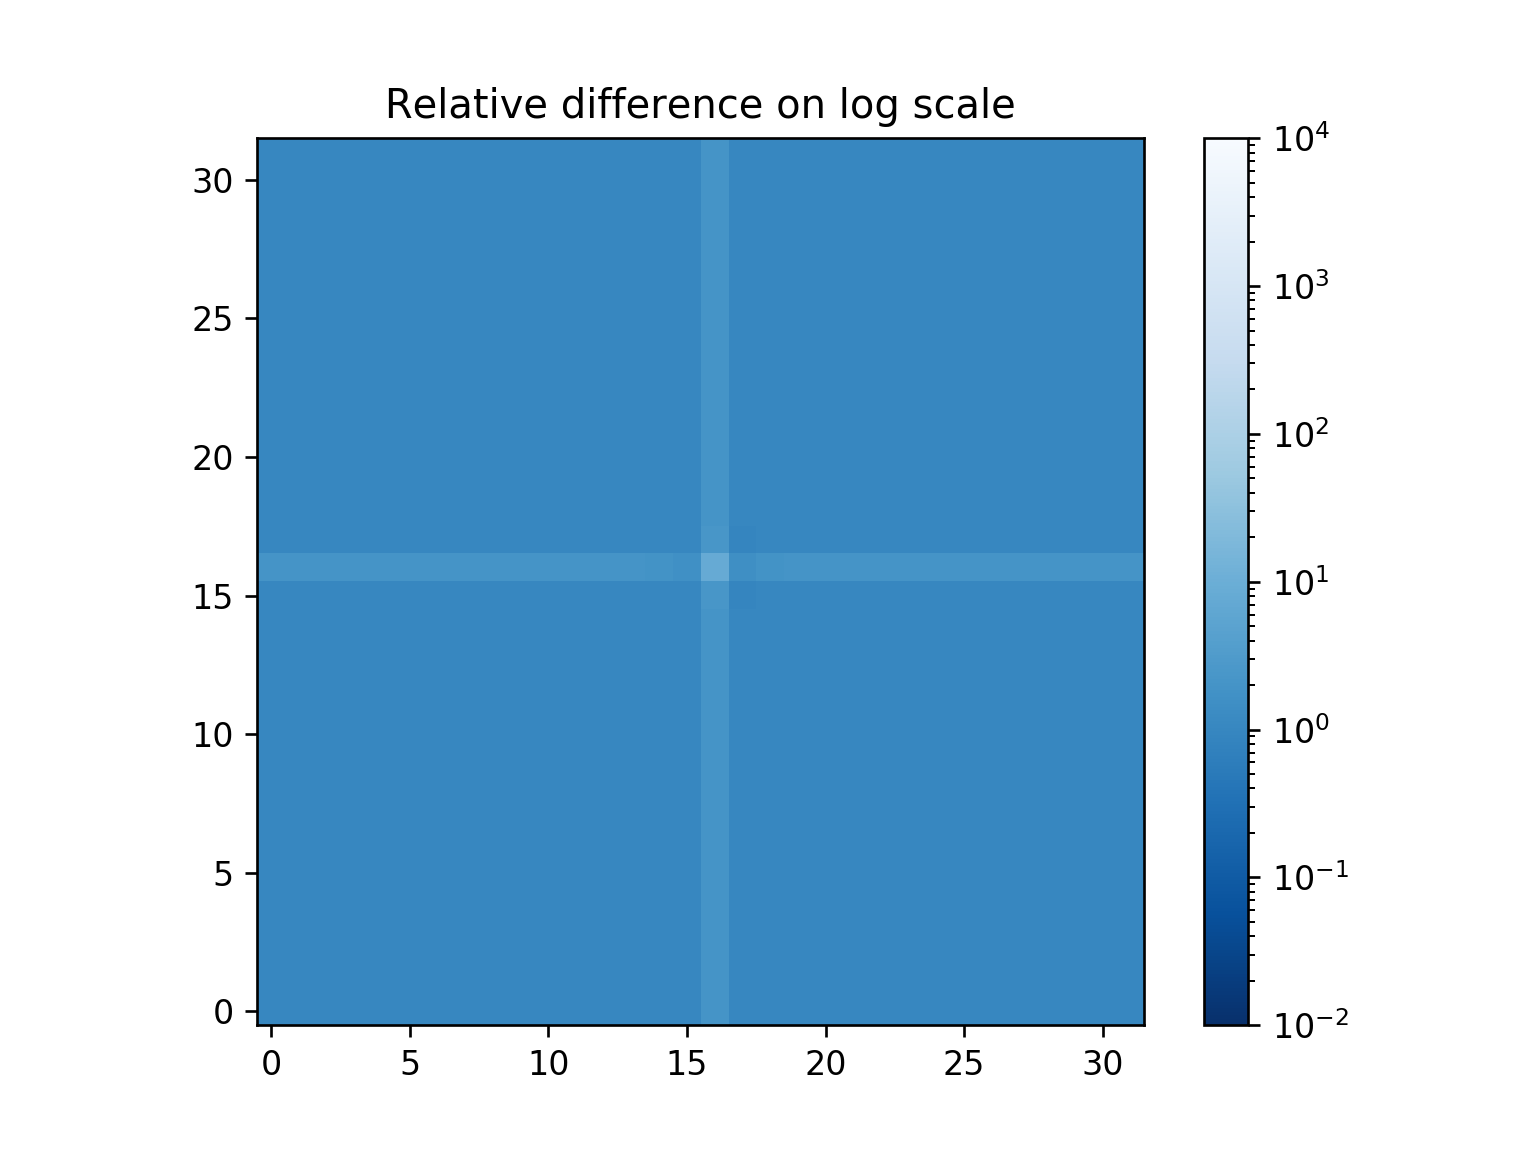

Text(0.5, 1.0, 'Relative difference on log scale')

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(q, interpolation='none', origin='lower',
               cmap='Blues_r',
               norm=matplotlib.colors.LogNorm(vmin=1e-2,vmax=1e4))
fig.colorbar(cs)
ax.set_title("Relative difference on log scale")

----------
### Demonstration of undersampling

In [21]:
R2 = calculate2dGaussianArray(20, 20, 0.5, fftShift=True)
dfR = calculate2dGaussianArray(20, 20, 0.5, inFrequencySpace=True, fftShift=True)
fR2 = np.fft.fft2(R2)

In [22]:
D = fR2.real - dfR

Compare the two Fourier transform visually first

<IPython.core.display.Javascript object>


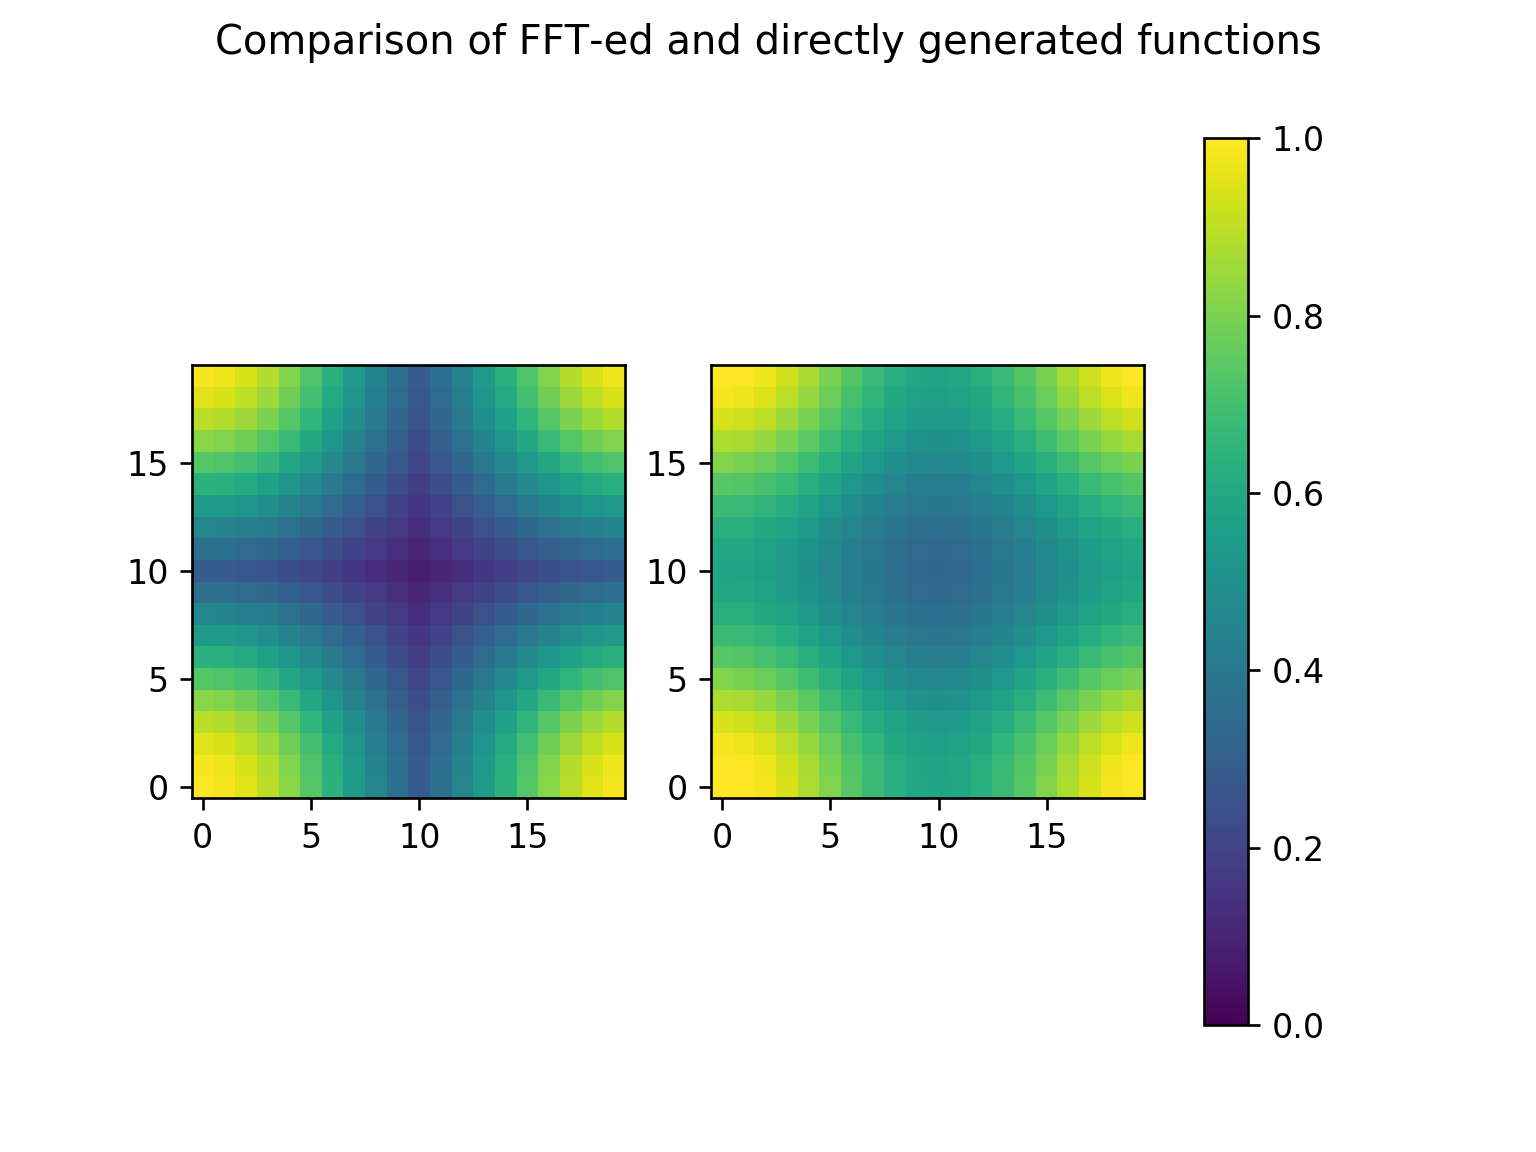

Text(0.5, 0.98, 'Comparison of FFT-ed and directly generated functions')

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(dfR, origin='lower', vmin=0, vmax=1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(fR2.real, origin='lower', vmin=0, vmax=1)
fig.colorbar(cs, ax=[ax, ax2])
fig.suptitle("Comparison of FFT-ed and directly generated functions")

See the difference on a log scale

<IPython.core.display.Javascript object>


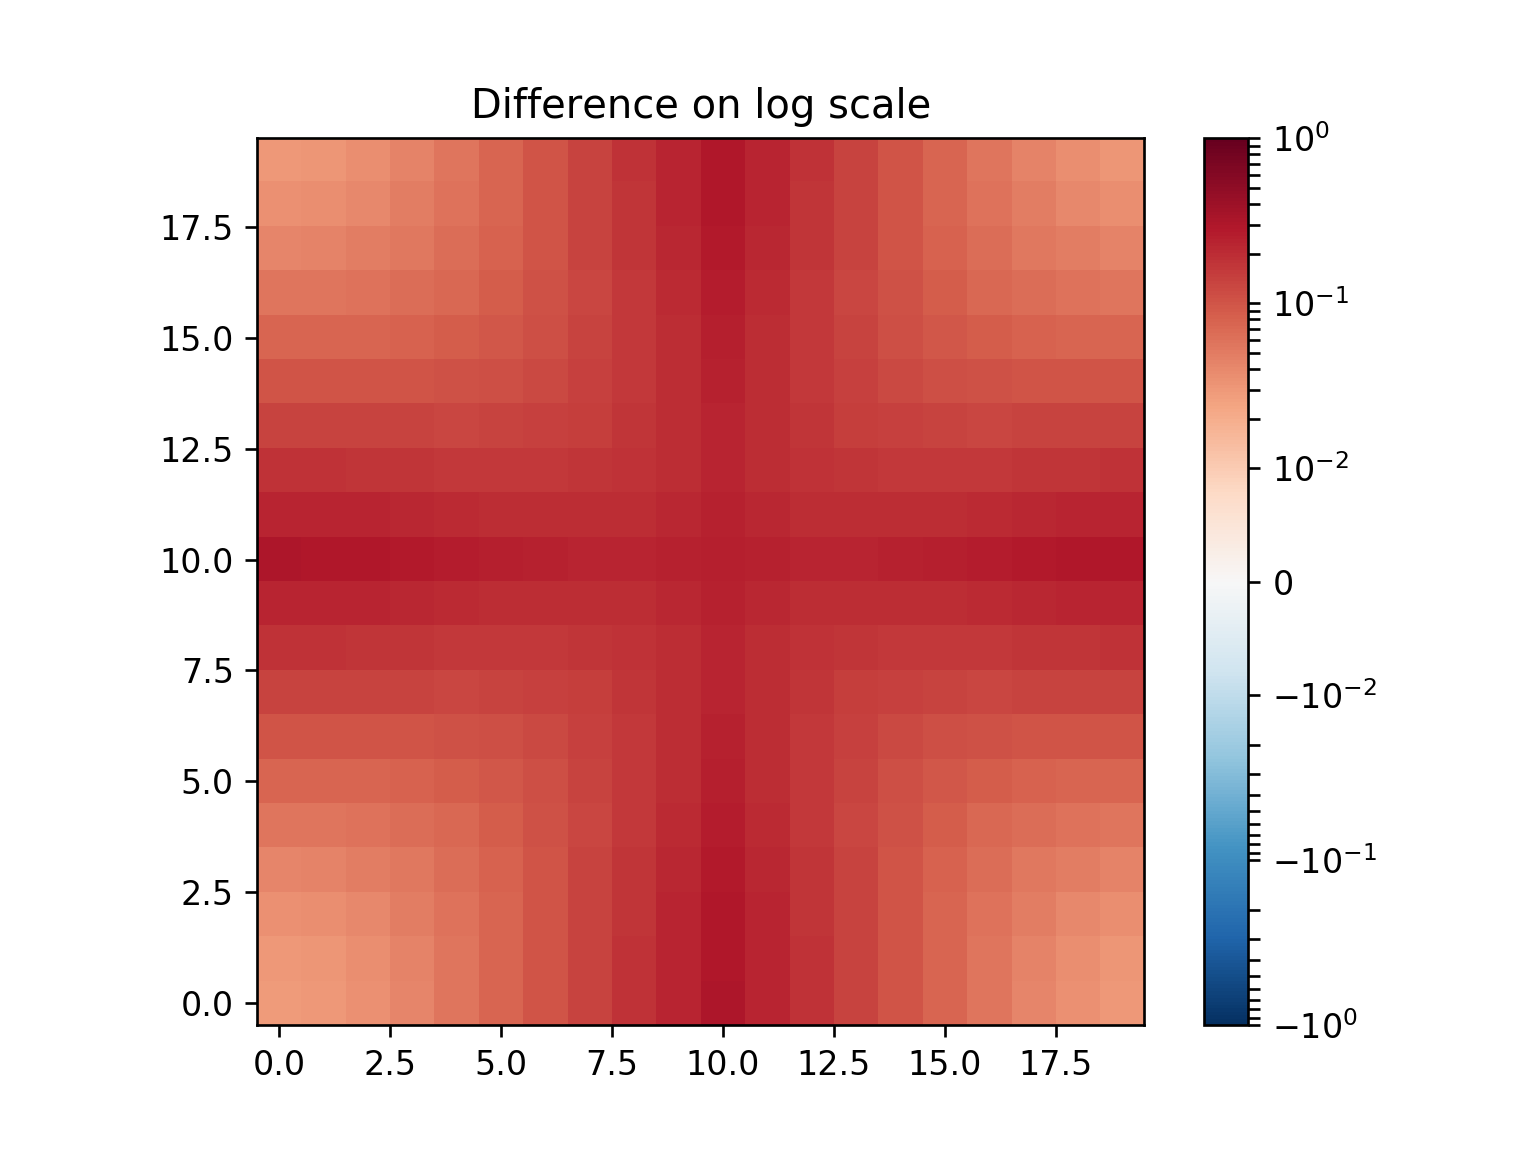

Text(0.5, 1.0, 'Difference on log scale')

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(D, interpolation='none', origin='lower', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(base=10, linthresh=1e-2,vmin=-1,vmax=1))
fig.colorbar(cs)
ax.set_title("Difference on log scale")

The FFT of the sampled Gaussian is now well above the theoretical one and the difference is worse towards higher frequencies. Recall that if it were a single pixel it would have been interpreted as a dirac delta that has constant value Fourier transform.